In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai.conv_learner import *

In [8]:
PATH1 = "D:/FAST.Ai/Idea/OCR/"

In [9]:
os.listdir(PATH1)

['data',
 'models',
 'New Microsoft Excel Worksheet.xlsx',
 'ocr.csv',
 'ocr.xlsx',
 'squared_data',
 'tmp',
 'train.csv']

In [10]:
from fastai.plots import *

In [11]:
from planet import *

In [12]:
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *
from sklearn.metrics import fbeta_score
import warnings

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

def opt_th(preds, targs, start=0.17, end=0.24, step=0.01):
    ths = np.arange(start,end,step)
    idx = np.argmax([fbeta_score(targs, (preds>th), 2, average='samples')
                for th in ths])
    return ths[idx]

def get_data_zoom(f_model, path, sz, bs, n, cv_idx):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return get_data(path, tfms, bs, n, cv_idx)

def get_data_pad(f_model, path, sz, bs, n, cv_idx):
    transforms_pt = [RandomRotateZoom(9, 0.18, 0.1), RandomLighting(0.05, 0.1), RandomDihedral()]
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_pt, pad=sz//12)
    return get_data(path, tfms, bs, n, cv_idx)

In [13]:
metrics=[f2]
f_model = resnet34

In [14]:
label_csv = f'{PATH1}ocr.csv'

In [15]:
n = len(list(open(label_csv))) - 1

In [16]:
n

5

In [17]:
val_idxs = get_cv_idxs(n)

In [18]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    # transforms_top_down means full set of possible transformasions  
    return ImageClassifierData.from_csv(PATH1, 'data', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs)#, test_name='test-jpg')

In [19]:
sz = 64
data = get_data(sz)

In [20]:
fn = PATH1 + data.trn_ds.fnames[0]

In [21]:
fn

'D:/FAST.Ai/Idea/OCR/data\\20cce081f833c47cc58ca579f9bc1cd7eb8189a7.jpg'

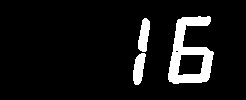

In [276]:
img = PIL.Image.open(fn); img

In [277]:
img.size

(246, 100)

In [278]:
it = iter(data.val_dl)

In [279]:
x,y = next(it)

In [280]:
y


 1  0  0  0
[torch.FloatTensor of size 1x4]

In [22]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


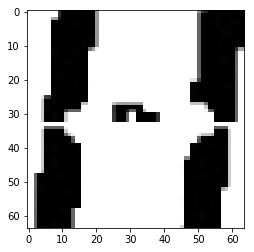

In [282]:
plt.imshow(data.val_ds.denorm(to_np(x))[0] * 1.4)

In [283]:
list(zip(y[0],data.classes))

[(1.0, '0'), (0.0, '1'), (0.0, '10'), (0.0, '6')]

In [206]:
learn = ConvLearner.pretrained(f_model,data,metrics = metrics)

epoch      trn_loss   val_loss   f2                                                                                    
    0      1.046528   0.801613   0.555556  



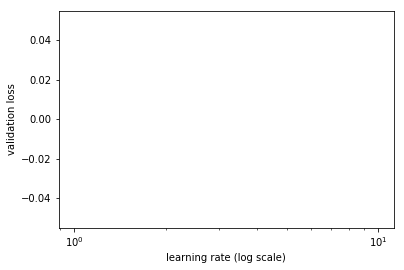

In [207]:
lrf = learn.lr_find()
learn.sched.plot()

In [98]:
lr = 0.2

In [99]:
learn.fit(lr,3,cycle_len = 1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.979422   0.742429   0.555556  
    1      0.892775   0.734385   0.555556                                                                              
    2      0.794796   0.455336   0.625                                                                                 
    3      0.745244   0.476076   0.555556                                                                              
    4      0.721367   0.185629   1.0                                                                                   
    5      0.663115   0.201498   0.714286                                                                              
    6      0.597608   0.112555   1.0                                                                                   



[array([0.11255]), 1.0]

# reading numbers from folders and turnig them to CSV

In [121]:
PATH=Path('D:/FAST.Ai/Idea/Seven-Segment-OCR-master/Datasets_Eleven')

In [474]:
for j in range(10,100,10):
    print(j)

10
20
30
40
50
60
70
80
90


In [475]:
for j in range(100,1000,100):
    print(j)

100
200
300
400
500
600
700
800
900


In [126]:
CLASSES = ['0','1','2','3','4', '5','6','7','8','9']

def get_texts(path):
    texts,labels = [],[]
    for label in (CLASSES):
        for fname in (path/label).glob('*.*'):
            texts.append(fname)
            labels.append(label)
    return np.array(texts),np.array(labels)

trn_texts,trn_labels = get_texts(PATH)

# some vericfication on the images and label of them

In [130]:
trn_texts[0]

WindowsPath('D:/FAST.Ai/Idea/Seven-Segment-OCR-master/Datasets_Eleven/0/01cbb4e0a7fd47251fc1340aa9df876ebd41a0c2 - 2.jpg')

In [132]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [139]:
len(trn_texts)

223

In [164]:
num = 200

In [165]:
photo_data = misc.imread(trn_texts[num])

C:\Users\Lenovo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


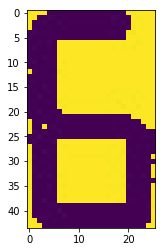

In [166]:
plt.imshow((photo_data))

In [167]:
trn_labels[num]

'6'

In [168]:
# it is OK!

In [173]:
name_trn_texts = []
for i in range(len(trn_texts)):
    name_trn_texts.append(str(trn_texts[i]).split("\\")[-1].split(".")[0])

In [174]:
name_trn_texts[:5]

['01cbb4e0a7fd47251fc1340aa9df876ebd41a0c2 - 2',
 '01cbb4e0a7fd47251fc1340aa9df876ebd41a0c2 - 3',
 '02b292a500dfb9192379fe830534cfd8b38f003f - 2',
 '02b292a500dfb9192379fe830534cfd8b38f003f - 3',
 '04dc6be4599a36518fcb26bf9355508d57ce6887 - 3']

In [175]:
str(trn_texts[0]).split("\\")[-1].split(".")[0]

'01cbb4e0a7fd47251fc1340aa9df876ebd41a0c2 - 2'

In [176]:
len(name_trn_texts),len(trn_labels)

(223, 223)

In [177]:
col_names = ['fname','labels']

In [178]:
np.random.seed(40)
trn_idx = np.random.permutation(len(trn_texts))

In [182]:
name_trn_texts[10]

'0a07d2cff5beb0580bca191427e8cd6e1a0eb678 - 3'

In [190]:
np_name_trn_texts = np.array(name_trn_texts)

In [191]:
np_name_trn_texts =np_name_trn_texts[trn_idx]
trn_labels = trn_labels[trn_idx]

In [192]:
df_trn = pd.DataFrame({'fname':np_name_trn_texts, 'labels':trn_labels}, columns=col_names)

In [193]:
df_trn.head()

fname labels
0  6be6106d6ca690c46cd575d85294185c86081006 - 0      6
1  7d5791314bdebcf4d57b8c7f0358abe7cc1003e8 - 4      0
2  2b1f5ea851600eec2cc600014ffd59a320c096e3 - 1      0
3  7b46efce5cb470220e16da197406c8b21ea2c840 - 1      3
4  2bf3406560e9dc92dbcb5b50291689e7ff858a80 - 3      0

In [195]:
df_trn.to_csv(PATH1+'train.csv', header=False, index=False)

# doing model again with more data

In [231]:
metrics=[f2]
f_model = resnet34

In [232]:
label_csv = f'{PATH1}train.csv'

In [233]:
n = len(list(open(label_csv)))

In [234]:
n

223

In [235]:
val_idxs = get_cv_idxs(n)

In [236]:
def get_data(sz , bs):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1)
    # transforms_top_down means full set of possible transformasions  
    return ImageClassifierData.from_csv(PATH1, 'data', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs , bs=bs)#, test_name='test-jpg')

In [237]:
sz = 64
data = get_data(sz , bs = 64)

In [238]:
fn = PATH1 + data.trn_ds.fnames[0]

In [239]:
fn

'D:/FAST.Ai/Idea/OCR/data\\7d5791314bdebcf4d57b8c7f0358abe7cc1003e8 - 4.jpg'

In [240]:
img = PIL.Image.open(fn); img

In [241]:
img.size

(18, 44)

In [242]:
it = iter(data.val_dl)

In [243]:
x,y = next(it)

In [244]:
y


    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     0     1     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     1     0     0
    0     0     0     0     1     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     0     1     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     0     0     0     1     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     0     1     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     1     0     0     0     0    

In [245]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


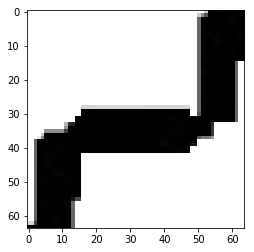

In [246]:
plt.imshow(data.val_ds.denorm(to_np(x))[14] * 1.4)

In [247]:
list(zip(y[14],data.classes))

[(0.0, '0'),
 (0.0, '1'),
 (1.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


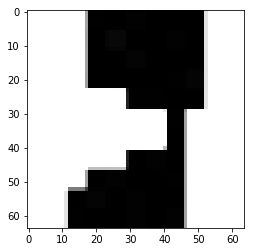

In [248]:
plt.imshow(data.val_ds.denorm(to_np(x))[38] * 1.4)

In [249]:
list(zip(y[38],data.classes))

[(0.0, '0'),
 (1.0, '1'),
 (0.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


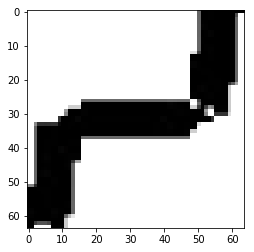

In [250]:
plt.imshow(data.val_ds.denorm(to_np(x))[22] * 1.4)

In [251]:
list(zip(y[22],data.classes))

[(0.0, '0'),
 (0.0, '1'),
 (1.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


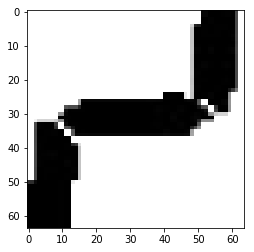

In [252]:
plt.imshow(data.val_ds.denorm(to_np(x))[33] * 1.4)

In [253]:
list(zip(y[33],data.classes))

[(0.0, '0'),
 (0.0, '1'),
 (1.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

In [467]:
data.classes

['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [468]:
list(zip(y[0],data.classes))

[(0.0, ''),
 (1.0, '0'),
 (0.0, '1'),
 (0.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

In [469]:
learn = ConvLearner.pretrained(f_model,data,metrics = metrics)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.854284   0.696591   0.333333  



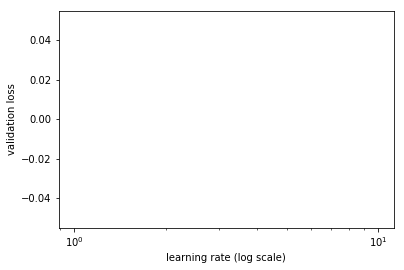

In [470]:
lrf = learn.lr_find()
learn.sched.plot()

In [471]:
lr = 0.2

In [472]:
learn.fit(lr,3,cycle_len = 1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.81621    0.704349   0.318723  
    1      0.79561    0.611462   0.325758                                                                              
    2      0.753613   0.57373    0.32684                                                                               
    3      0.713313   0.44539    0.334749                                                                              
    4      0.660779   0.3625     0.433146                                                                              
    5      0.609966   0.331974   0.467803                                                                              
    6      0.568601   0.325715   0.461174                                                                              



[array([0.32571]), 0.46117424242424243]

In [476]:
lrs = np.array([lr/9,lr/3,lr])

In [477]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.387238   0.315017   0.452611  
    1      0.379385   0.293509   0.457759                                                                              
    2      0.364676   0.291616   0.440255                                                                              
    3      0.350164   0.288877   0.463925                                                                              
    4      0.340589   0.286873   0.42307                                                                               
    5      0.330408   0.288825   0.4136                                                                                
    6      0.323771   0.279147   0.446429                                                                              



[array([0.27915]), 0.4464285714285715]

In [478]:
learn.save(f'{sz}')

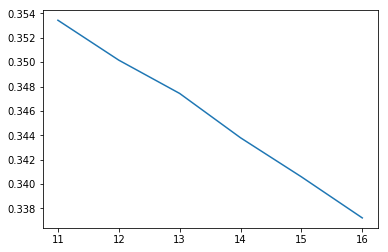

In [479]:
learn.sched.plot_loss()

In [480]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [489]:
preds.shape

(44, 11)

In [490]:
preds

array([[0.03104, 0.26702, 0.09012, 0.12829, 0.13665, 0.03581, 0.09719, 0.1597 , 0.04527, 0.04293, 0.06707],
       [0.0333 , 0.38581, 0.11073, 0.18697, 0.073  , 0.06364, 0.07009, 0.13096, 0.07722, 0.08236, 0.05694],
       [0.02593, 0.35972, 0.06782, 0.1136 , 0.08347, 0.03693, 0.08905, 0.10349, 0.03992, 0.04722, 0.03212],
       [0.03313, 0.16345, 0.03806, 0.13587, 0.13649, 0.01415, 0.12461, 0.1288 , 0.02417, 0.01909, 0.07872],
       [0.02844, 0.31311, 0.08406, 0.0948 , 0.06078, 0.06052, 0.08184, 0.127  , 0.0394 , 0.04532, 0.03253],
       [0.03727, 0.33486, 0.07604, 0.09454, 0.08673, 0.05791, 0.05848, 0.1054 , 0.04407, 0.06765, 0.04435],
       [0.04266, 0.36143, 0.07875, 0.12515, 0.06553, 0.07281, 0.04553, 0.10606, 0.05241, 0.05615, 0.04095],
       [0.0416 , 0.32814, 0.09809, 0.11951, 0.11477, 0.05552, 0.08656, 0.12634, 0.05472, 0.07486, 0.04546],
       [0.0212 , 0.29278, 0.06538, 0.1746 , 0.14773, 0.04058, 0.08012, 0.13518, 0.03167, 0.05199, 0.04043],
       [0.023  , 0.30348, 0.

In [497]:
one_number_preds = np.argmax(preds,axis=1)
one_number_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 7, 1, 1, 1], dtype=int64)

In [495]:
one_number_y = np.argmax(y,axis=1)
one_number_y

array([ 1,  1,  3,  8,  5,  1,  1,  3,  1,  5,  1,  1,  1,  1,  3,  1,  2,  4,  1,  3,  1,  3,  3,  3,  6,
        1,  1,  6,  2,  1,  1,  1,  3,  3,  5,  6,  1,  3,  2,  1,  1,  7,  1, 10], dtype=int64)

# accuracy

In [499]:
np.mean(one_number_preds == one_number_y)

0.4090909090909091

# resizing 

In [536]:
from PIL import Image

In [537]:
image = Image.open('D:/FAST.Ai/Idea/OCR/data\\01cbb4e0a7fd47251fc1340aa9df876ebd41a0c2 - 3.jpg')

In [539]:
image.show()

In [540]:
print(image.size) 

(28, 44)


In [545]:
new_image = image.resize((44, 44))
new_image.save('D:/FAST.Ai/Idea/OCR/data/image_400.jpg')

print(image.size) 
print(new_image.size)

(28, 44)
(44, 44)


In [544]:
new_image.show()

### doing that for all

In [608]:
PATH2 = "D:/FAST.Ai/Idea/OCR/squared_data/"

In [609]:
def resize(path):
    for fname in (path).glob('*.*'):
        image = Image.open(fname)
        image_name = str(fname).split("\\")[-1].split(".")[0]
        #print(image_name)
        new_image = image.resize((64, 64))
        new_image.save(PATH2+image_name+".jpg")

In [610]:
resize(Path(PATH1+"data"))

# doing the same thing but squerd size

In [196]:
metrics=[f2]
f_model = resnet34

In [197]:
label_csv = f'{PATH1}train.csv'

In [198]:
n = len(list(open(label_csv)))

In [199]:
n

223

In [200]:
val_idxs = get_cv_idxs(n)

In [201]:
def get_data(sz , bs):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1)
    # transforms_top_down means full set of possible transformasions  
    return ImageClassifierData.from_csv(PATH1, 'squared_data', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs , bs=bs)#, test_name='test-jpg')

In [202]:
sz = 64
data = get_data(sz , bs = 64)

In [203]:
fn = PATH1 + data.trn_ds.fnames[0]

In [204]:
fn

'D:/FAST.Ai/Idea/OCR/squared_data\\7d5791314bdebcf4d57b8c7f0358abe7cc1003e8 - 4.jpg'

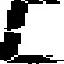

In [205]:
img = PIL.Image.open(fn); img

In [206]:
img.size

(64, 64)

In [207]:
it = iter(data.val_dl)

In [208]:
x,y = next(it)

In [209]:
y


    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     0     1     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     1     0     0
    0     0     0     0     1     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     0     1     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     0     0     0     1     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     0     1     0     0     0     0     0     0     0
    1     0     0     0     0     0     0     0     0     0
    0     1     0     0     0     0    

In [210]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


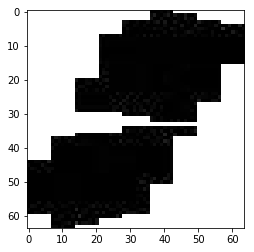

In [229]:
plt.imshow(data.val_ds.denorm(to_np(x))[28] * 1.4)

In [230]:
list(zip(y[28],data.classes))

[(0.0, '0'),
 (1.0, '1'),
 (0.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


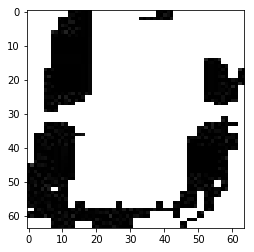

In [213]:
plt.imshow(data.val_ds.denorm(to_np(x))[20] * 1.4)

In [214]:
list(zip(y[20],data.classes))

[(1.0, '0'),
 (0.0, '1'),
 (0.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


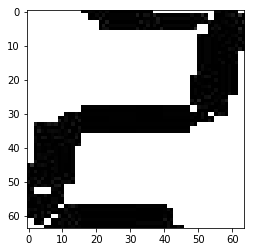

In [215]:
plt.imshow(data.val_ds.denorm(to_np(x))[22] * 1.4)

In [216]:
list(zip(y[22],data.classes))

[(0.0, '0'),
 (0.0, '1'),
 (1.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


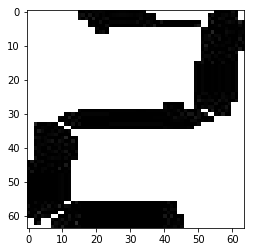

In [217]:
plt.imshow(data.val_ds.denorm(to_np(x))[33] * 1.4)

In [218]:
list(zip(y[33],data.classes))

[(0.0, '0'),
 (0.0, '1'),
 (1.0, '2'),
 (0.0, '3'),
 (0.0, '4'),
 (0.0, '5'),
 (0.0, '6'),
 (0.0, '7'),
 (0.0, '8'),
 (0.0, '9')]

In [219]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [255]:
learn = ConvLearner.pretrained(f_model,data,metrics = metrics)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.838117   0.800447   0.357143  



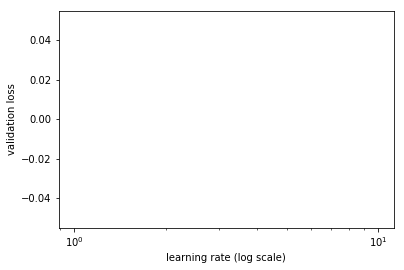

In [256]:
lrf = learn.lr_find()
learn.sched.plot()

In [262]:
lr = 0.2

In [258]:
learn.fit(lr,3,cycle_len = 1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.847371   0.761145   0.358392  
    1      0.768707   0.553673   0.388032                                                                              
    2      0.700444   0.480298   0.392416                                                                              
    3      0.648665   0.304521   0.518257                                                                              
    4      0.581917   0.229883   0.647547                                                                              
    5      0.523025   0.198695   0.762852                                                                              
    6      0.477346   0.19428    0.775162                                                                              



[array([0.19428]), 0.7751623376623378]

In [259]:
learn.fit(lr,3,cycle_len = 1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.257157   0.188775   0.775929  
    1      0.246762   0.165535   0.79789                                                                               
    2      0.235647   0.159327   0.799378                                                                              
    3      0.225946   0.13593    0.829545                                                                              
    4      0.214022   0.123747   0.829545                                                                              
    5      0.203152   0.117721   0.829545                                                                              
    6      0.194896   0.116949   0.829545                                                                              



[array([0.11695]), 0.8295454545454546]

In [263]:
learn.fit(lr,3,cycle_len = 1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.157187   0.10975    0.829545  
    1      0.154545   0.107097   0.841991                                                                              
    2      0.151383   0.106337   0.834416                                                                              
    3      0.153449   0.104367   0.838203                                                                              
    4      0.147472   0.102065   0.858225                                                                              
    5      0.146033   0.101059   0.855519                                                                              
    6      0.146899   0.100929   0.855519                                                                              



[array([0.10093]), 0.8555194805194806]

In [264]:
learn.fit(lr,3,cycle_len = 1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.13134    0.100495   0.858225  
    1      0.134967   0.098103   0.87243                                                                               
    2      0.134122   0.097367   0.87243                                                                               
    3      0.135821   0.094977   0.864719                                                                              
    4      0.135586   0.093675   0.864719                                                                              
    5      0.134911   0.095487   0.864719                                                                              
    6      0.135168   0.095584   0.864719                                                                              



[array([0.09558]), 0.8647186147186148]

In [265]:
lrs = np.array([lr/9,lr/3,lr])

In [266]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.271092   0.078011   0.890152  
    1      0.240288   0.165951   0.772186                                                                              
    2      0.218828   0.137728   0.795455                                                                              
    3      0.198361   0.138672   0.874459                                                                              
    4      0.185882   0.148491   0.886905                                                                              
    5      0.174133   0.132715   0.890693                                                                              
    6      0.166421   0.122229   0.894075                                                                              



[array([0.12223]), 0.8940746753246753]

In [267]:
learn.save(f'{sz}')

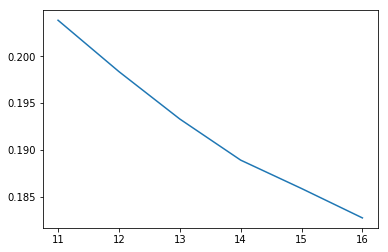

In [268]:
learn.sched.plot_loss()

In [269]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [270]:
preds.shape

(44, 10)

In [271]:
preds

array([[0.99746, 0.01326, 0.00322, 0.00451, 0.00537, 0.00347, 0.00405, 0.01261, 0.00626, 0.00386],
       [0.99831, 0.00338, 0.00923, 0.00691, 0.00712, 0.00574, 0.01341, 0.01634, 0.02075, 0.00674],
       [0.00092, 0.00218, 0.85169, 0.01029, 0.02558, 0.07819, 0.06007, 0.01047, 0.00204, 0.00611],
       [0.23235, 0.12829, 0.06787, 0.03463, 0.03105, 0.02791, 0.04466, 0.39357, 0.00913, 0.01272],
       [0.01835, 0.00549, 0.0539 , 0.11016, 0.22799, 0.05416, 0.48601, 0.02061, 0.0629 , 0.0587 ],
       [0.13518, 0.32388, 0.04039, 0.0436 , 0.04223, 0.02982, 0.06135, 0.28265, 0.01355, 0.01663],
       [0.99178, 0.00586, 0.00299, 0.00673, 0.00755, 0.00333, 0.01571, 0.00438, 0.02017, 0.0073 ],
       [0.00018, 0.00218, 0.99977, 0.00319, 0.00266, 0.04169, 0.00128, 0.00153, 0.00019, 0.00096],
       [0.99932, 0.00383, 0.00567, 0.00273, 0.00248, 0.00231, 0.00854, 0.0064 , 0.00607, 0.003  ],
       [0.03281, 0.00516, 0.056  , 0.06749, 0.23991, 0.04479, 0.47781, 0.01085, 0.08651, 0.04169],
       [0.

In [272]:
one_number_preds = np.argmax(preds,axis=1)
one_number_preds

array([0, 0, 2, 7, 6, 1, 0, 2, 0, 6, 0, 0, 0, 0, 2, 0, 1, 3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       6, 2, 0, 2, 1, 0, 0, 6, 0, 6], dtype=int64)

In [273]:
one_number_y = np.argmax(y,axis=1)
one_number_y

array([0, 0, 2, 7, 4, 0, 0, 2, 0, 4, 0, 0, 0, 0, 2, 0, 1, 3, 0, 2, 0, 2, 2, 2, 5, 0, 0, 5, 1, 0, 0, 0, 2, 2,
       4, 5, 0, 2, 1, 0, 0, 6, 0, 9], dtype=int64)

# accuracy

In [274]:
np.mean(one_number_preds == one_number_y)

0.8181818181818182

In [ ]:
mislabeled or in csv 

In [ ]:
solving the problem of '' that leads to 0

In [ ]:
mnist

In [ ]:
finding some csv for SVHN

In [ ]:
changing the arch 

In [ ]:
showing augmentation ,rotating >> https://auth0.com/blog/image-processing-in-python-with-pillow/

In [ ]:
more data of Datasets_digits folder

In [ ]:
change num of classes to 30  no no  to 10 + 1(space) +
+ 11 (eleventh is because it can not to have any dahgan or sadgan) + 11

In [ ]:
edit final accuracy measuring 

In [ ]:
multi lable , writing in csv 

In [ ]:
glucometer , with learn.set_data(get_data(sz))

In [ ]:
if i was suppoused to write the package :
    getting the softmax for each 11 or 10 group 